#1. Autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from keras.layers import Input, Dense, Activation, Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D, Flatten, BatchNormalization, Reshape
from tensorflow.keras.models import Model, Sequential
from keras.datasets import cifar10
import tensorflow_datasets as tfds

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

170500096/170498071 [==============================] - 4s 0us/step


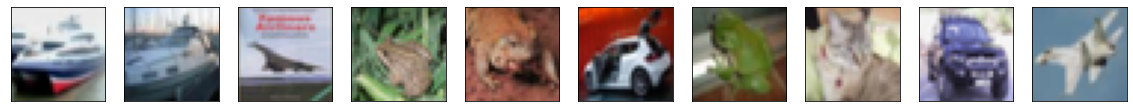

In [3]:
n = 10
plt.figure(figsize = (20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
input_img = tfk.Input(shape=(32, 32, 3))

x = tfkl.Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(input_img)
x = tfkl.MaxPooling2D((2, 2), padding = 'same')(x)
x = tfkl.Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
encoded = tfkl.MaxPooling2D((2, 2), padding = 'same')(x)


x = tfkl.Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(encoded)
x = tfkl.UpSampling2D((2, 2))(x)
x = tfkl.Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = tfkl.UpSampling2D((2, 2))(x)
decoded = tfkl.Conv2D(3, (3, 3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = tfk.Model(input_img, decoded)
autoencoder.summary()

autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 128)      

In [5]:
autoencoder.fit(x_train, x_train, epochs = 10, batch_size = 150, shuffle = True, steps_per_epoch = 200, validation_data = (x_test, x_test))

Epoch 1/10
200/200 [==============================] - 4s 22ms/step - loss: 0.5813 - accuracy: 0.6823 - val_loss: 0.5651 - val_accuracy: 0.7616
Epoch 2/10
200/200 [==============================] - 4s 21ms/step - loss: 0.5628 - accuracy: 0.7819 - val_loss: 0.5614 - val_accuracy: 0.7991
Epoch 3/10
200/200 [==============================] - 4s 21ms/step - loss: 0.5599 - accuracy: 0.7985 - val_loss: 0.5594 - val_accuracy: 0.8030
Epoch 4/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5581 - accuracy: 0.8007 - val_loss: 0.5582 - val_accuracy: 0.8162
Epoch 5/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5575 - accuracy: 0.8089 - val_loss: 0.5574 - val_accuracy: 0.8180
Epoch 6/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5575 - accuracy: 0.8097 - val_loss: 0.5599 - val_accuracy: 0.8114
Epoch 7/10
200/200 [==============================] - 4s 20ms/step - loss: 0.5557 - accuracy: 0.8130 - val_loss: 0.5581 - val_accuracy: 0.8274

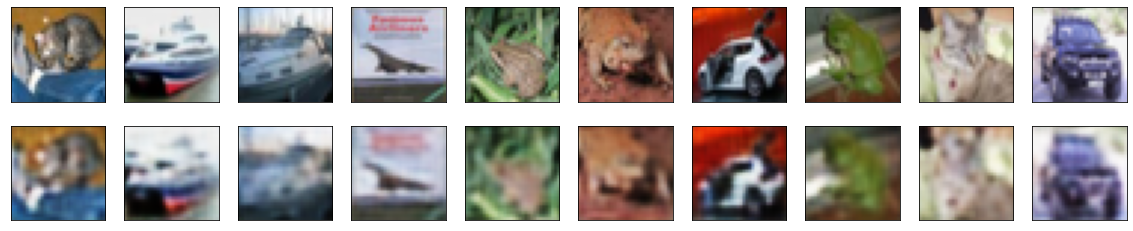

In [6]:
pred_img = autoencoder.predict(x_test)

n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_img[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#2. Image Classification
##2.1 Deep CNN

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))

from tensorflow.keras.utils import to_categorical
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)

x_train = x_train.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))

x_test = x_test.astype('float32') / 255 
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

In [8]:
data, info = tfds.load('cifar10', with_info = True)
img_shape = info.features['image'].shape
img_shape

input_img = Input(shape=(32, 32, 3))

x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D((2, 2), padding = 'same')(x)

x = Flatten()(encoded)
x = Dense(100, activation = 'relu')(x)
decoded = Dense(10, activation = 'softmax')(x)

deep_cnn = tfk.Model(input_img, decoded)
deep_cnn.summary()

deep_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteH0L8IS/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteH0L8IS/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          9232    

In [9]:
deep_cnn.fit(x_train, y_train, epochs = 10, batch_size = 500, shuffle = True, validation_data = (x_test, y_test))

Epoch 1/10
  1/100 [..............................] - ETA: 0s - loss: 2.3079 - accuracy: 0.1020WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0078s vs `on_train_batch_end` time: 0.0221s). Check your callbacks.


 99/100 [============================>.] - ETA: 0s - loss: 1.8824 - accuracy: 0.3193WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0035s vs `on_test_batch_end` time: 0.0059s). Check your callbacks.


100/100 [==============================] - 3s 32ms/step - loss: 1.8797 - accuracy: 0.3202 - val_loss: 1.6054 - val_accuracy: 0.4041
Epoch 2/10
100/100 [==============================] - 3s 30ms/step - loss: 1.4990 - accuracy: 0.4553 - val_loss: 1.3850 - val_accuracy: 0.5002
Epoch 3/10
100/100 [==============================] - 3s 30ms/step - loss: 1.3488 - accuracy: 0.5150 - val_loss: 1.2975 - val_accuracy: 0.5339
Epoch 4/10
100/100 [==============================] - 3s 30ms/step - loss: 1.2656 - accuracy: 0.5512 - val_loss: 1.2099 - val_accuracy: 0.5687
Epoch 5/10
100/100 [==============================] - 3s 30ms/step - loss: 1.1814 - accuracy: 0.5836 - val_loss: 1.1852 - val_accuracy: 0.5811
Epoch 6/10
100/100 [==============================] - 3s 30ms/step - loss: 1.1222 - accuracy: 0.6043 - val_loss: 1.1229 - val_accuracy: 0.6030
Epoch 7/10
100/100 [==============================] - 3s 30ms/step - loss: 1.0668 - accuracy: 0.6232 - val_loss: 1.0496 - val_accuracy: 0.6293
Epoch 8/10

In [10]:
print("accuracy score on training set: ")
score_train = deep_cnn.evaluate(x_train, y_train, verbose = 0)
print(score_train[1])
print("accuracy score on test set: ")
test_images = np.array(list(map(lambda x: np.resize(x, (48, 48, 3)), x_test)))
score_test = deep_cnn.evaluate(x_test, y_test, verbose = 0)
print(score_test[1])

accuracy score on training set: 
0.670960009098053
accuracy score on test set: 
0.652400016784668


##2.2 Transfer Learning

In [11]:
train_images = np.array(list(map(lambda x: np.resize(x, (32, 32, 3)), x_train)))
train_images.shape

(50000, 32, 32, 3)

In [12]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

58892288/58889256 [==============================] - 1s 0us/step


In [13]:
conv_base.trainable = False

model = tfk.models.Sequential()

model.add(conv_base)
model.add(tfkl.Flatten())
model.add(tfkl.Dense(64, activation = 'relu'))
model.add(tfkl.Dropout(0.5))
model.add(tfkl.Dense(10, activation = 'softmax'))

model.summary()

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
model.fit(train_images, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
782/782 [==============================] - 10s 12ms/step - loss: 1.6877 - accuracy: 0.4030
Epoch 2/5
782/782 [==============================] - 10s 12ms/step - loss: 1.4554 - accuracy: 0.4933
Epoch 3/5
782/782 [==============================] - 10s 12ms/step - loss: 1.3847 - accuracy: 0.5198
Epoch 4/5
782/782 [==============================] - 10s 12ms/step - loss: 1.3561 - accuracy: 0.5304
Epoch 5/5
782/782 [==============================] - 10s 12ms/step - loss: 1.3412 - accuracy: 0.5395


In [15]:
print("accuracy score on training set: ")
score_train = model.evaluate(train_images, y_train, verbose = 0)
print(score_train[1])
print("accuracy score on test set: ")
test_images = np.array(list(map(lambda x: np.resize(x, (32, 32, 3)), x_test)))
score_test = model.evaluate(x_test, y_test, verbose = 0)
print(score_test[1])

accuracy score on training set: 
0.5982599854469299
accuracy score on test set: 
0.5719000101089478


#3. Text Classification
##3.1 RNN

In [16]:
from keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, SimpleRNN, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
spam = pd.read_csv('SPAM_detection.csv') 
spam.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [19]:
words = 50000
max_len = 250
dim = 100

message = spam['Message']
label = spam['category_val']

In [20]:
max_features = 10000
maxlen = 500

tokenizer = Tokenizer()

tokenizer.fit_on_texts(message)
sequences = tokenizer.texts_to_sequences(message)
data = pad_sequences(sequences, maxlen = maxlen)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = label[indices]

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)

In [22]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, epochs = 10, batch_size = 60, validation_data = (x_test, y_test))

Epoch 1/10
75/75 [==============================] - 2s 30ms/step - loss: 0.2859 - accuracy: 0.8963 - val_loss: 0.1273 - val_accuracy: 0.9740
Epoch 2/10
75/75 [==============================] - 2s 24ms/step - loss: 0.0911 - accuracy: 0.9807 - val_loss: 0.0601 - val_accuracy: 0.9821
Epoch 3/10
75/75 [==============================] - 2s 24ms/step - loss: 0.0444 - accuracy: 0.9904 - val_loss: 0.0407 - val_accuracy: 0.9883
Epoch 4/10
75/75 [==============================] - 2s 24ms/step - loss: 0.0285 - accuracy: 0.9919 - val_loss: 0.0542 - val_accuracy: 0.9830
Epoch 5/10
75/75 [==============================] - 2s 24ms/step - loss: 0.0341 - accuracy: 0.9899 - val_loss: 0.0429 - val_accuracy: 0.9874
Epoch 6/10
75/75 [==============================] - 2s 24ms/step - loss: 0.0176 - accuracy: 0.9953 - val_loss: 0.0370 - val_accuracy: 0.9910
Epoch 7/10
75/75 [==============================] - 2s 24ms/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0463 - val_accuracy: 0.9839
Epoch 8/10
75

In [24]:
acc = model.evaluate(x_test, y_test)
print("Test loss is {},  accuracy is {}  ".format(acc[0],acc[1]))

35/35 [==============================] - 0s 10ms/step - loss: 0.0438 - accuracy: 0.9883
Test loss is 0.0437757633626461,  accuracy is 0.9883407950401306  


##3.2 CNN

In [25]:
import re
spam.Message = spam.Message.apply(lambda x: x.lower()).apply(lambda x: re.sub(r'[^\w\s]','',x) )

def concat_list(l):
  concat = ''
  for word in l:
      concat += word + ' '
  return concat

spam.Message = [concat_list(data) for data in spam.Message]

In [26]:
from keras.preprocessing import text as keras_text, sequence as keras_seq

tokenizer2 = Tokenizer(filters ='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower = True, char_level = True, oov_token = True)
tokenizer2.fit_on_texts(spam.Message.values)

X = tokenizer2.texts_to_sequences(spam.Message.values)
X = pad_sequences(X, maxlen = 50)
Y = np.array(spam.category_val)

In [27]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.2)

In [28]:
model2 = Sequential()

model2.add(Embedding(10000,250,input_length=X_train2.shape[1]))
model2.add(tfkl.Conv1D(32,5, activation='tanh'))
model2.add(GlobalMaxPooling1D())
model2.add(tfkl.Dense(1,activation="sigmoid"))

model2.summary()

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 250)           2500000   
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 32)            40032     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,540,065
Trainable params: 2,540,065
Non-trainable params: 0
_________________________________________________________________


In [29]:
model2.fit(X_train2,Y_train2,epochs = 5, validation_data = (X_test2, Y_test2), batch_size = 64, verbose = 1)

Epoch 1/5
70/70 [==============================] - 2s 27ms/step - loss: 0.2970 - accuracy: 0.8948 - val_loss: 0.1483 - val_accuracy: 0.9641
Epoch 2/5
70/70 [==============================] - 2s 24ms/step - loss: 0.1714 - accuracy: 0.9542 - val_loss: 0.1395 - val_accuracy: 0.9641
Epoch 3/5
70/70 [==============================] - 2s 24ms/step - loss: 0.1589 - accuracy: 0.9538 - val_loss: 0.1356 - val_accuracy: 0.9650
Epoch 4/5
70/70 [==============================] - 2s 24ms/step - loss: 0.1486 - accuracy: 0.9551 - val_loss: 0.1184 - val_accuracy: 0.9668
Epoch 5/5
70/70 [==============================] - 2s 25ms/step - loss: 0.1386 - accuracy: 0.9569 - val_loss: 0.1142 - val_accuracy: 0.9695


In [30]:
acc2 = model2.evaluate(X_test2, Y_test2)
print("Test loss is {} accuracy is {}  ".format(acc2[0],acc2[1]))

35/35 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9695
Test loss is 0.11422374844551086 accuracy is 0.9695067405700684  


##3.3 ROC

In [32]:
y_pred1 = model.predict(x_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)

y_pred2 = model2.predict(X_test2)
fpr2, tpr2, thresholds2 = roc_curve(Y_test2, y_pred2)

from sklearn.metrics import auc
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2,tpr2)

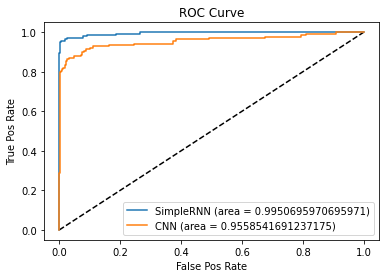

In [33]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label = 'SimpleRNN (area = {})'.format(auc1))
plt.plot(fpr2, tpr2, label = 'CNN (area = {})'.format(auc2))

plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()